### About Dataset

In May 2022 over 70,000 developers told StackOverflow how they learn and level up, which tools they’re using, and what they want.

Survey focused on below topics:

1. Developer Profile / Respondent's profile:
    1. Education.
    2. Learning to code.
    3. Experience.
    4. Developer roles.
    5. Key territories.
    6. Demographics.
2. Technology: Tools and technologies developers are currently using and what they want to use.
3. Work: Respondent's employment, company info, salary, influence, hobby etc.
4. Community: How people use Stack Overflow and how connected they feel to the StackOverflow community.
5. Professional Developers: Respondent's Work lifestyle, work experience etc.
6. Methodology: Feedback on survey.

These are the questions that I will try to answer and get insights from:
1. What's the most popular method of learning to code?
2. What are the most commonly used programming languages among developers?
3. Which countries have the highest average developer salaries?

To get started, let's read in the necessary libraries we will need to wrangle our data

In [110]:
# import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Load the survey results public data
df = pd.read_csv('./survey_results_public.csv')
df.head()

,ResponseId,MainBranch,Employment,RemoteWork,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,LearnCodeCoursesCert,YearsCode,...,TimeSearching,TimeAnswering,Onboarding,ProfessionalTech,TrueFalse_1,TrueFalse_2,TrueFalse_3,SurveyLength,SurveyEase,ConvertedCompYearly
0,1,None of these,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,"Employed, full-time",Fully remote,Hobby;Contribute to open-source projects,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Difficult,NaN
2,3,"I am not primarily a developer, but I write co...","Employed, full-time","Hybrid (some remote, some in-person)",Hobby,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Friend or family member...,Technical documentation;Blogs;Programming Game...,NaN,14,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Neither easy nor difficult,40205.0
3,4,I am a developer by profession,"Employed, full-time",Fully remote,I don’t code outside of work,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Books / Physical media;School (i.e., Universit...",NaN,NaN,20,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,215232.0
4,5,I am a developer by profession,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Stack Overflow;O...,NaN,8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN


In [111]:
# Get info of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73268 entries, 0 to 73267
Data columns (total 79 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   ResponseId                      73268 non-null  int64  
 1   MainBranch                      73268 non-null  object 
 2   Employment                      71709 non-null  object 
 3   RemoteWork                      58958 non-null  object 
 4   CodingActivities                58899 non-null  object 
 5   EdLevel                         71571 non-null  object 
 6   LearnCode                       71580 non-null  object 
 7   LearnCodeOnline                 50685 non-null  object 
 8   LearnCodeCoursesCert            29389 non-null  object 
 9   YearsCode                       71331 non-null  object 
 10  YearsCodePro                    51833 non-null  object 
 11  DevType                         61302 non-null  object 
 12  OrgSize                         

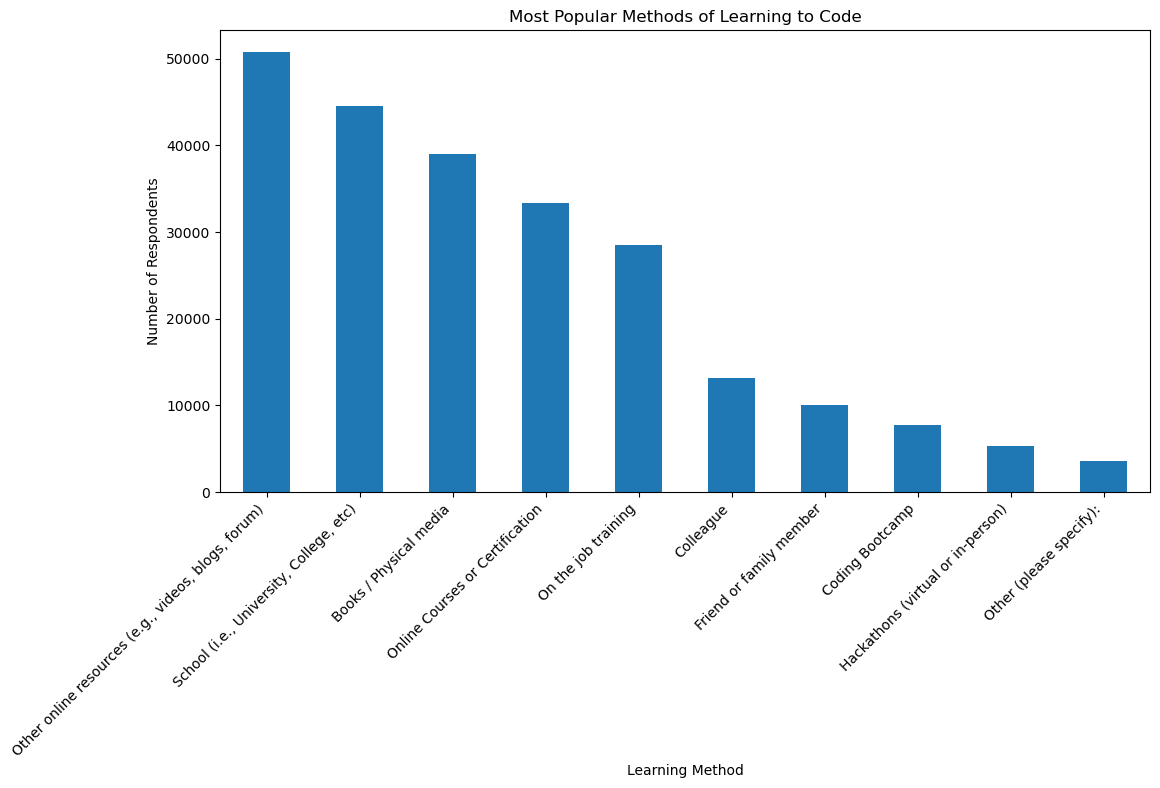

In [112]:
# Question: What's the most popular method of learning to code?

#I will clean the dataset to focus on LearnCode column and drop rows with missing values
df_learn = df[['LearnCode']].dropna()

#Here I will split the LearnCode column into multiple rows for each method
learn_code_methods = df_learn['LearnCode'].str.split(';', expand=True).stack().reset_index(level=1, drop=True)

#Count the occurrences of each learning method
learn_code_method_counts = learn_code_methods.value_counts()

#plot the popular methods
plt.figure(figsize=(12, 6))
learn_code_method_counts.plot(kind='bar')
plt.title('Most Popular Methods of Learning to Code')
plt.xlabel('Learning Method')
plt.ylabel('Number of Respondents')
plt.xticks(rotation=45, ha='right')
plt.show()

#### Answer

This plot showcases the varied learning approaches developers use, with a notable movement toward online and self-paced learning.

This trend indicates that the development community appreciates a broad spectrum of learning options, acknowledging that skills and knowledge can be gained through many different avenues beyond conventional education.

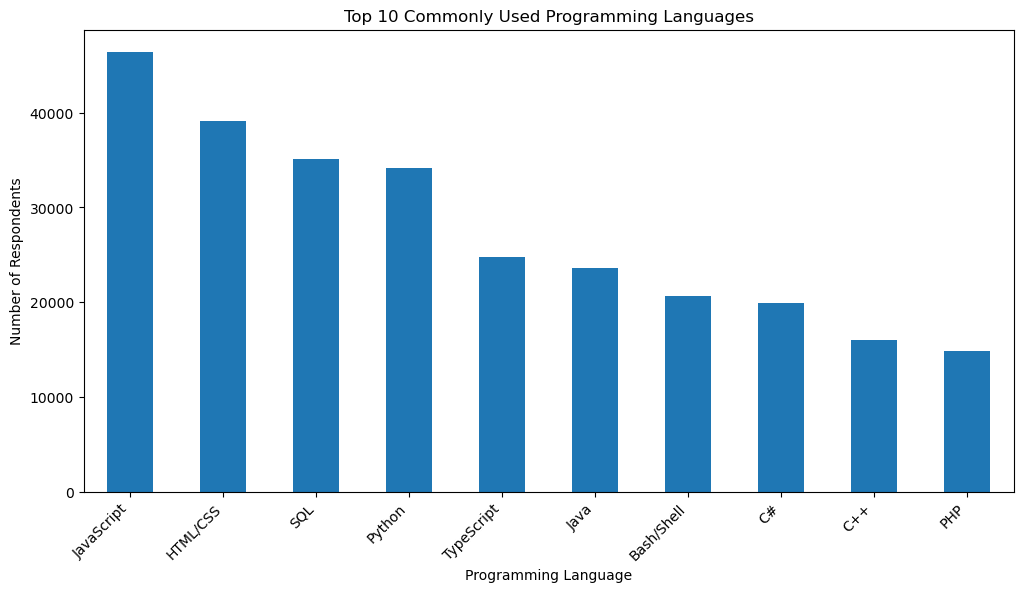

In [114]:
# QUESTION: What are the most commonly used programming languages among developers?

#I will clean the dataset to focus on LanguageHaveWorkedWith column and drop rows with missing values
df_commonly_used_programming_languages = df[['LanguageHaveWorkedWith']].dropna()

#Split the LanguageHaveWorkedWith column into multiple rows for each language
languages_used = df_commonly_used_programming_languages['LanguageHaveWorkedWith'].str.split(';', expand=True).stack().reset_index(level=1, drop=True)

#Count the occurrences of each programming language
languages_used_counts = languages_used.value_counts()

#Plot the top 10 commonly used programming languages
plt.figure(figsize=(12, 6))
languages_used_counts.head(10).plot(kind='bar')
plt.title('Top 10 Commonly Used Programming Languages')
plt.xlabel('Programming Language')
plt.ylabel('Number of Respondents')
plt.xticks(rotation=45, ha='right')
plt.show()

#### Answer

The plot shows that the most popular programming languages among respondents are JavaScript, HTML/CSS, SQL, Python, and TypeScript.

These languages are heavily utilized in different fields, such as web development, data analysis, and software engineering, which accounts for their widespread use.

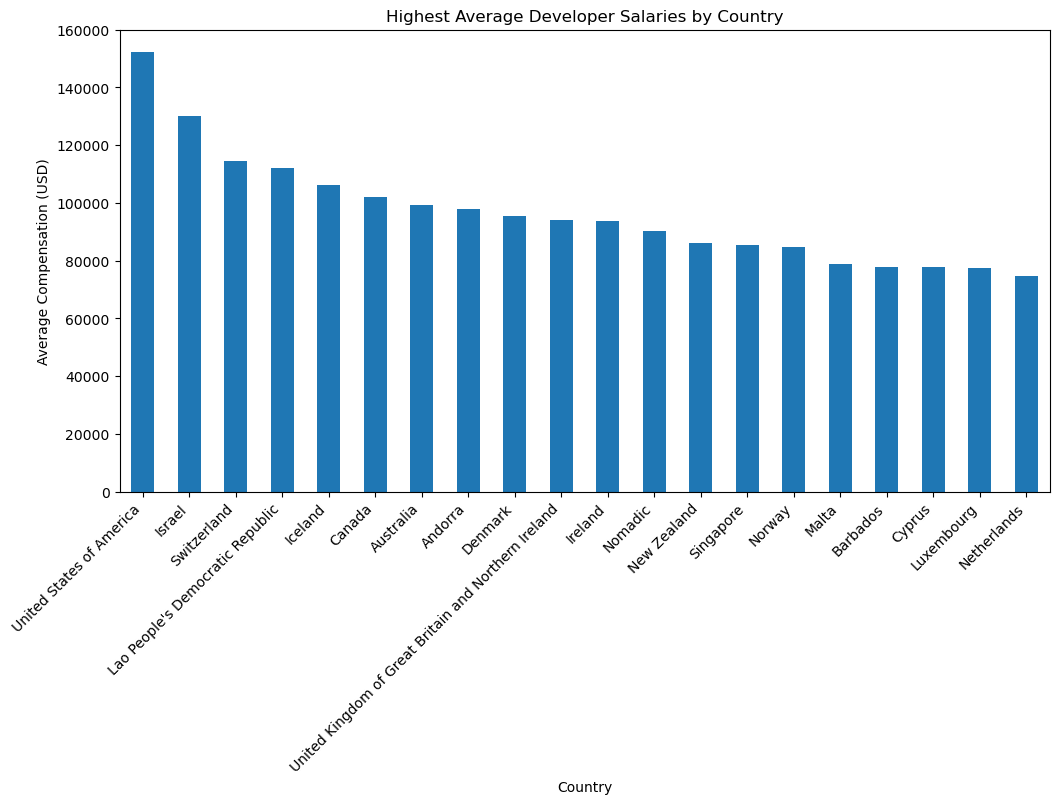

In [116]:
# QUESTION: Which countries have the highest average developer salaries?

#Clean the dataset to focus on relevant columns and drop rows with missing values
relevant_columns = ['Country', 'ConvertedCompYearly']
df_country_with_compensation = df[relevant_columns].dropna()

# Convert compensation to numeric
df_country_with_compensation['ConvertedCompYearly'] = pd.to_numeric(df_country_with_compensation['ConvertedCompYearly'], errors='coerce')

# Remove rows with NaN values in 'ConvertedCompYearly'
df_country_with_compensation = df_country_with_compensation.dropna()

# Filter out outliers
df_country_with_compensation = df_country_with_compensation[df_country_with_compensation['ConvertedCompYearly'] <= 500000]

# Group by 'Country' and calculate the mean compensation
country_pay = df_country_with_compensation.groupby('Country')['ConvertedCompYearly'].mean().sort_values(ascending=False)

# Plot the highest average developer salaries by country
plt.figure(figsize=(12, 6))
country_pay.head(20).plot(kind='bar')
plt.title('Highest Average Developer Salaries by Country')
plt.xlabel('Country')
plt.ylabel('Average Compensation (USD)')
plt.xticks(rotation=45, ha='right')
plt.show()

#### Answer

The data and plot indicate that the United States, Israel, and Switzerland have the highest average salaries for developers.

Developers looking for higher pay might benefit from exploring relocation or remote work opportunities with companies in these countries.

### Conclusion

In summary, the analysis highlights key trends in the developer community:

- **Diverse Learning Approaches:** Developers are increasingly adopting online and self-paced learning methods, moving away from traditional educational paths.
- **Popular Programming Languages:** JavaScript, HTML/CSS, SQL, Python, and TypeScript are the most commonly used languages due to their wide application in web development, data analysis, and software engineering.
- **Higher Salary Opportunities:** The United States, Israel, and Switzerland offer the highest average salaries for developers, suggesting potential benefits for those considering relocation or remote work with companies in these countries.
